Autoencoder
---
Autoencoder are neural networks composed of two parts: The encoder and decoder.
The encoder takes the input and compress it to a latent vector z. The decoder takes the latent as input and try to reconstruct the input data. 

The network is trained to reconstruct the input data through the bottleneck created by the encoder-decoder.
We are going to create an autoencoder with Keras framework

Keras framework.
---
Keras is a framework to help create deep neural networks easily and efficiently. 
To create a neural network in Keras is needed to define:
The layers of the network, 
1. Create the Model.
2. Load the dataset.
3. Train the network.
4. Make the Prediction

Import the Keras Framework
---


In [0]:
%tensorflow_version 1.x  # This is to allow tensorflow v1 with keras.
import keras.backend as K #Import the keras backend that contains basic operations such as Cos, Exp, Log and so on.
from keras.models import Model, Sequential # it will be used to create the models (encoder, decoder, Autoencoder).
from keras.layers import Dense, Input # it imports the layer(s) to be used in the contruction.
from keras.losses import mean_squared_error, binary_crossentropy # loss function to be optimized.
from keras.optimizers import SGD, RMSprop, Adam # optimization algorithm.
from keras.datasets import mnist, fashion_mnist # Datasets to be used in the experiments.

import numpy as np

import matplotlib.pyplot as plt # Plot and show stuff
%matplotlib inline

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x  # This is to allow tensorflow v1 with keras.`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


Model of the Encoder
---
The encoder will be composed of  Dense Layers.

In [0]:

latent_dim = 10 #latent dimension

encoder = Sequential(name="encoder") # Instanciate the encoder model
encoder.add(Dense(128, input_shape=(784,), activation="relu")) # first dense layer with input shape 784 = 28*28
 # You can add more layers if you want here.
encoder.add(Dense(latent_dim)) # Latent vector.
encoder.summary() # shows the structure of networks.





Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model of the Decoder
---
The Decoder will be composed of 
 Dense Layers.


In [0]:
decoder =  Sequential(name="decoder")

decoder.add(Dense(128, activation="relu", input_shape=(latent_dim,) )) # Input of the autoencoder with the latent dimension
 # You can add more layers if you want here.
decoder.add(Dense(784, activation="sigmoid")) # Output of the decoder with shape 784 = 28*28.
decoder.summary()


Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               101136    
Total params: 102,544
Trainable params: 102,544
Non-trainable params: 0
_________________________________________________________________


Autoencoder Model
---
The autoencoder combines the encoder and decoder models.

In [0]:
input_img = Input(shape=(784,) ) # Defines the Input of the AE. 784 =28*28
z = encoder(input_img) # It obtains the latent vector from input image using the encoder.
recons = decoder(z) # it tries to reconstruct the input image from the input image.
ae = Model(input_img, recons) # Creates the AE model using the input of encoder (input_img) and output of decoder (recons).
ae.summary() # Show the model

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoder (Sequential)         (None, 10)                101770    
_________________________________________________________________
decoder (Sequential)         (None, 784)               102544    
Total params: 204,314
Trainable params: 204,314
Non-trainable params: 0
_________________________________________________________________


Loss Function
---
After the model is defined, we need to compile the model, defining what is the loss function and the optimization algorithm to be used during the training process.

In [0]:
opt = RMSprop(lr=1e-3) #Instanciates the optimizer setting the learning rate.
ae.compile(optimizer=opt, loss=mean_squared_error, metrics=["mean_squared_error"]) # compiles the model defining the optimization algorithm, loss function and metrics.

Datasets
---
We need to load the dataset. Often, the datasets are loaded from files. In such situation we should use Dataloader avaliable in Keras framework or use other means.
In our case, the dataset MNIST and MNIST fashion can be loaded using Keras API.



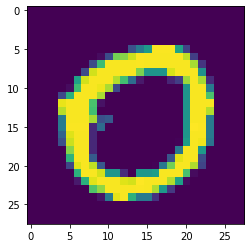

In [0]:
(x_train,y_train), (x_test,y_test) =  mnist.load_data() # Load mnist digits images and labels for train (x_train, y_train) and test (x_test, y_test).
# x_train is a tensor with 60.000 28x28 digits images for training.
# y_train is an array with labels for each images in train dataset.

# x_test is a tensor with 10.000 28x28 digits images for testing.
# y_test is an array with labels for each images in test set.

image = x_train[1040] # get the an image

plt.imshow(image) # show the digit just for curiosity.
plt.show()


Preprocessing the Dataset
---
1. The image if composed of pixels with values in the range [0-255]. It is a good practice to normalize the dataset to stay in the range [0-1].

2. Our AE is made of Dense layers. In such situation we need to flatten the image from (28,28) to 784 allowing to feed the network.

In [0]:
x_train = (x_train/255.0).astype(np.float32) # normalize the image and convert it to float.
x_test = (x_test/255.0).astype(np.float32) # normalize the image and convert it to float.

x_train = np.reshape(x_train, (-1, 784)) # Reshape the tensor to convert from the shape [60000, 28,28] => [60000, 784]
x_test = np.reshape(x_test, (-1, 784)) # Reshape the tensor to convert from the shape [10000, 28,28] => [10000, 784]
print(x_train[0]) #just for curiosity display the contat of a flatten image.


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Train the Network
---
With the data, we can train the autoencoder using the method fit of the model.


In [0]:

batch_size = 128
epochs = 10
ae.fit(x_train, x_train, batch_size=batch_size, epochs = epochs, validation_data=(x_test,x_test), verbose=1)




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 5s 80us/step - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0208 - mean_squared_error:

Seeing the Recontruction
---
After trained the encoder, decoder and AE can be used to extract feature, produce image and reconstruct. 


Original Image


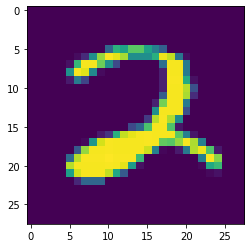

Reconstructed Image


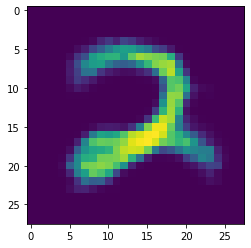

In [0]:
img = x_test[888] # get an image from the test dataset
imgb = np.reshape(img, (1, 784)) # reshape to have shape [1, 785]
recons_img = ae.predict( imgb ) # feed the AE and get outputs.

recons_img = np.reshape(recons_img, (28,28)) # reshape the predition to (28, 28)

print("Original Image")

img_original = np.reshape(img, (28,28)) # reshape from flatten to squared image.

plt.imshow(img_original)
plt.show()
print("Reconstructed Image")
plt.imshow(recons_img)
plt.show()


Tasks
---
1. Change the Optimizer from RMSProp to Adam. Is there some difference?
2. Change cross_entropy loss for mean_squared_error. What are the difference in aspect of the reconstructed image?
3. Add a Dense layer in the encoder and decoder with 256 neurons. What is the behavior of the loss during the training?
